Data definition: https://stat.ethz.ch/R-manual/R-devel/library/datasets/html/LifeCycleSavings.html

In [43]:
Life <- read.csv(file = "https://vincentarelbundock.github.io/Rdatasets/csv/datasets/LifeCycleSavings.csv", sep = ",", dec = ".", header = TRUE)

In [29]:
head(life)

X,sr,pop15,pop75,dpi,ddpi
Australia,11.43,29.35,2.87,2329.68,2.87
Austria,12.07,23.32,4.41,1507.99,3.93
Belgium,13.17,23.80,4.43,2108.47,3.82
Bolivia,5.75,41.89,1.67,189.13,0.22
Brazil,12.88,42.19,0.83,728.47,4.56
Canada,8.79,31.72,2.85,2982.88,2.43


In [54]:
life <-Life

In [76]:
life <- na.omit(life)
summary(life)
sus_life<-scale(life[,-1])
head(life[,-1])

         X            sr             pop15           pop75      
 Australia: 1   Min.   : 0.600   Min.   :21.44   Min.   :0.560  
 Austria  : 1   1st Qu.: 6.970   1st Qu.:26.21   1st Qu.:1.125  
 Belgium  : 1   Median :10.510   Median :32.58   Median :2.175  
 Bolivia  : 1   Mean   : 9.671   Mean   :35.09   Mean   :2.293  
 Brazil   : 1   3rd Qu.:12.617   3rd Qu.:44.06   3rd Qu.:3.325  
 Canada   : 1   Max.   :21.100   Max.   :47.64   Max.   :4.700  
 (Other)  :44                                                   
      dpi               ddpi       
 Min.   :  88.94   Min.   : 0.220  
 1st Qu.: 288.21   1st Qu.: 2.002  
 Median : 695.66   Median : 3.000  
 Mean   :1106.76   Mean   : 3.758  
 3rd Qu.:1795.62   3rd Qu.: 4.478  
 Max.   :4001.89   Max.   :16.710  
                                   

sr,pop15,pop75,dpi,ddpi
11.43,29.35,2.87,2329.68,2.87
12.07,23.32,4.41,1507.99,3.93
13.17,23.80,4.43,2108.47,3.82
5.75,41.89,1.67,189.13,0.22
12.88,42.19,0.83,728.47,4.56
8.79,31.72,2.85,2982.88,2.43


Removed any missing value and standardizing the data using R function.
Now, when everything is okay, we can do the clustering.

There are different functions available in R for computing hierarchical clustering. The commonly used functions are:

- `hclust` [in stats package] and `agnes` [in cluster package] for agglomerative hierarchical clustering (HC)
- `diana` [in cluster package] for divisive HC


# Agglomerative Hierarchical Clustering

We can perform agglomerative HC with `hclust`. First we compute the dissimilarity values with dist and then feed these values into `hclust` and specify the agglomeration method to be used (i.e. “complete”, “average”, “single”, “ward.D”). We can then plot the dendrogram.



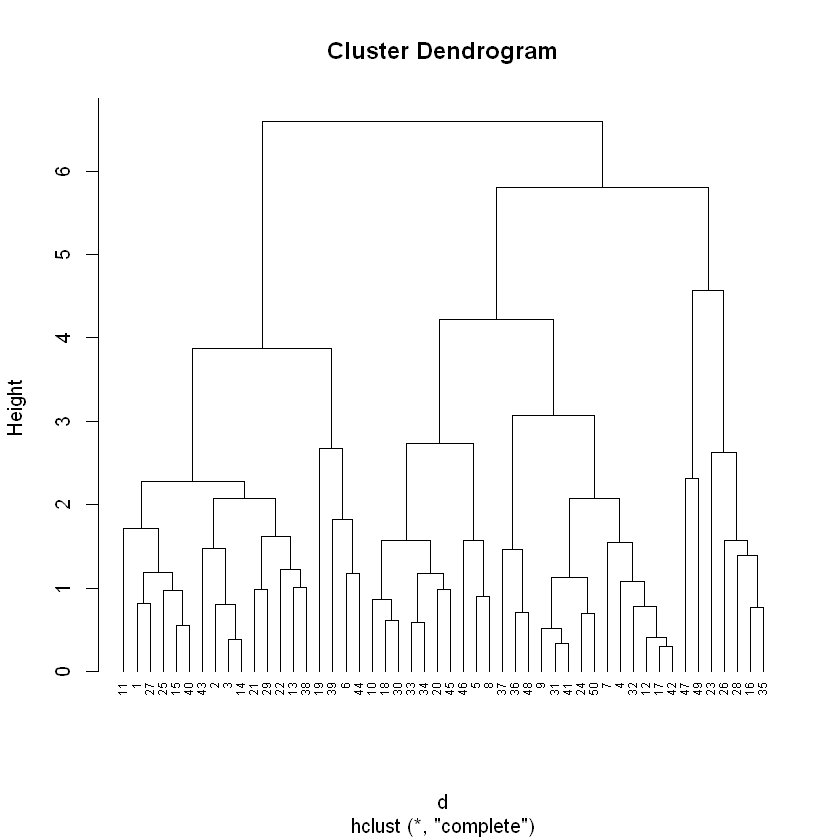

In [57]:
# Dissimilarity matrix
d <- dist(sus_life, method = "euclidean")

# Hierarchical clustering using Complete Linkage
hc1 <- hclust(d, method = "complete" )

# Plot the obtained dendrogram
plot(hc1, cex = 0.6, hang = -1)


Alternatively, I can use the `agnes` function. These functions behave very similarly; however, with the `agnes` function I can also get the agglomerative coefficient, which measures the amount of clustering structure found (values closer to 1 suggest strong clustering structure).
My dataset is not that big, however, I think that coefficient will be near 1.

In [58]:
# Compute with agnes
hc2 <- agnes(sus_life, method = "complete")

# Agglomerative coefficient
hc2$ac


[1] 0.8460782

The formula for the coefficient is

$$
AC = \frac{1}{n} \sum_{i} l(i)
$$

Generally speaking, the AC describes the strength of the clustering structure that has been obtained by group average linkage. However, the AC tends to become larger when n increases, so it should not be used to compare data sets of very different sizes.

This coeficient allows us to find certain hierarchical clustering methods that can identify stronger clustering structures. Here we see that Ward’s method identifies the strongest clustering structure of the four methods assessed.

In [59]:
# methods to assess
m <- c( "average", "single", "complete", "ward")
names(m) <- c( "average", "single", "complete", "ward")

# function to compute coefficient
ac <- function(x) {
  agnes(sus_life, method = x)$ac
}

map_dbl(m, ac)

average    single  complete      ward 
0.7661717 0.6349201 0.8460782 0.9340653

Similar to before we can visualize the dendrogram:

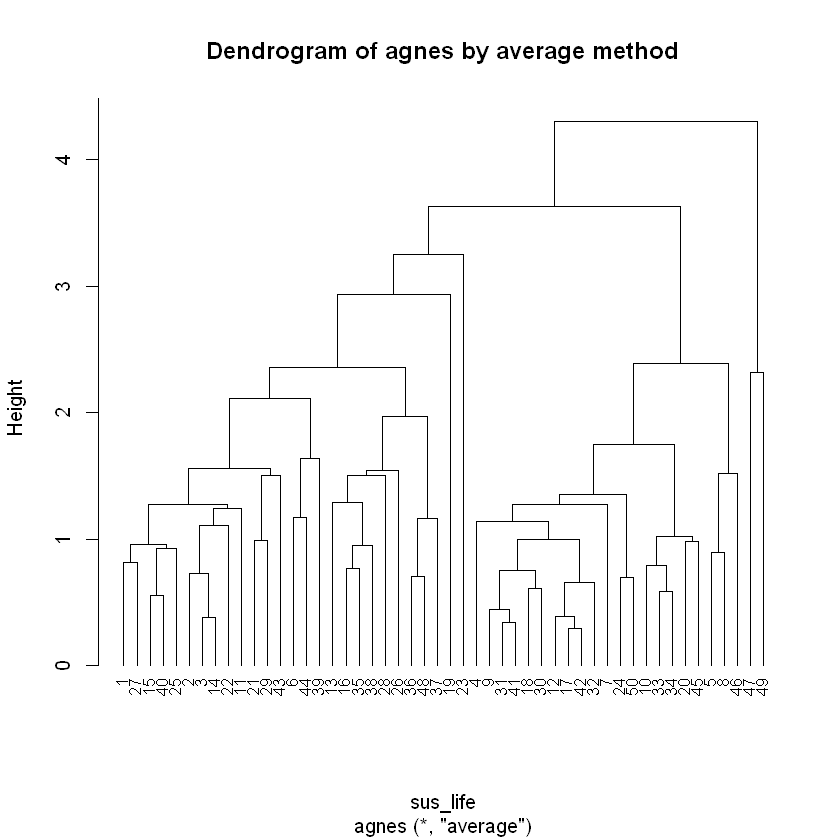

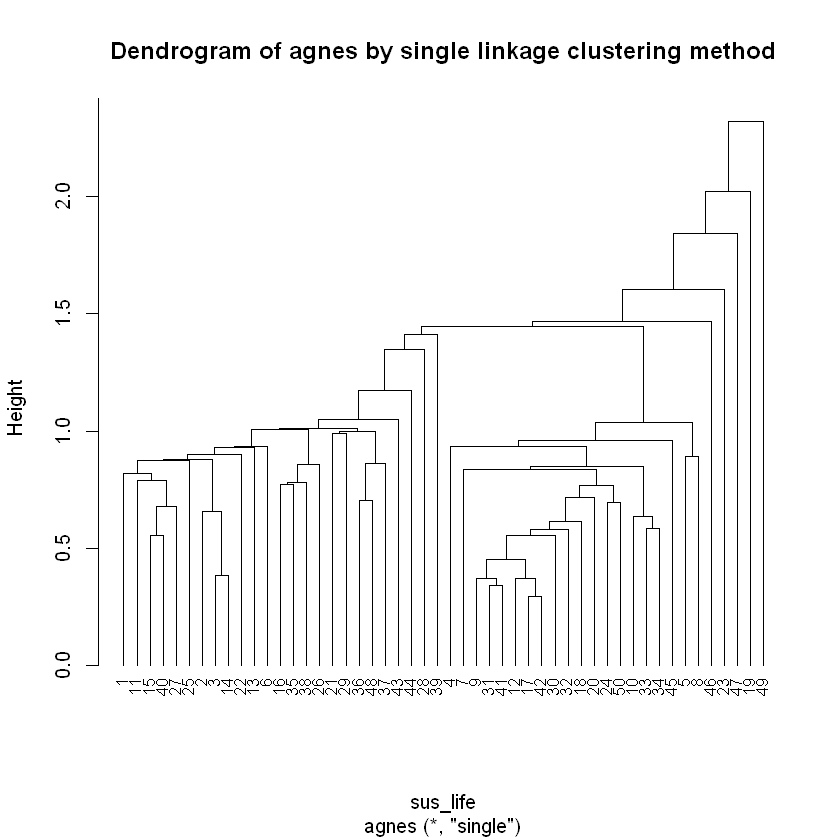

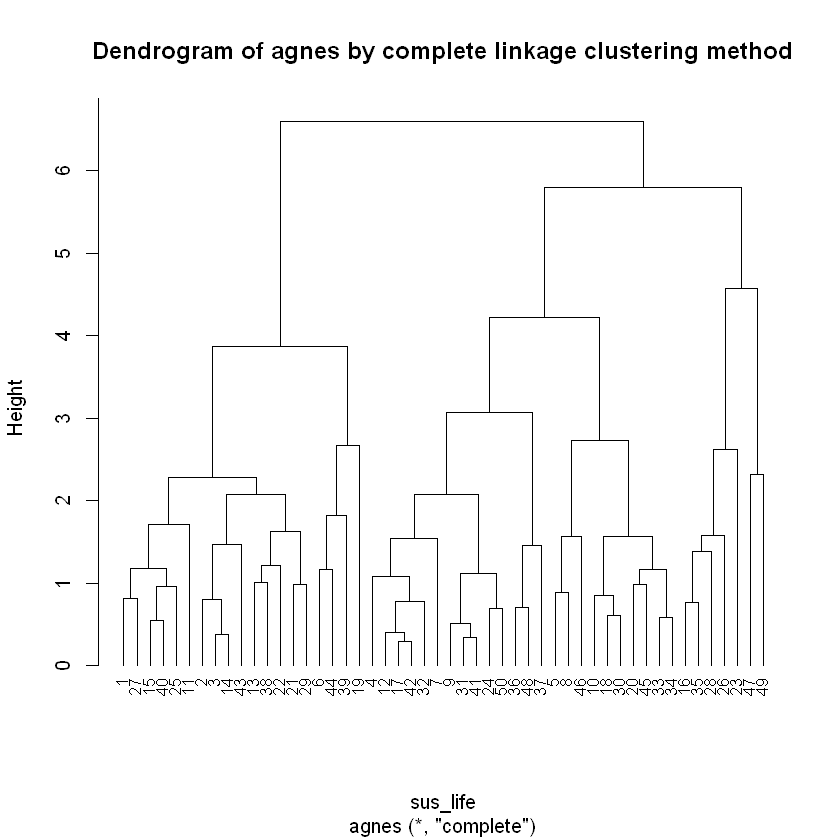

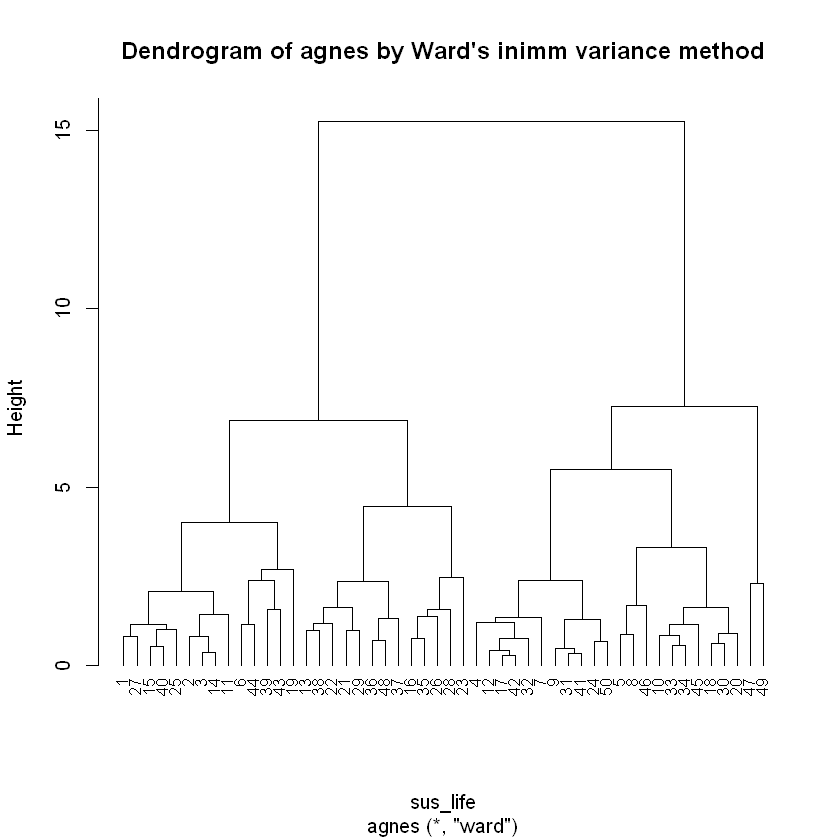

In [78]:
hc3 <- agnes(sus_life, method = "average")
pltree(hc3, cex = 0.8, hang = -1, main = "Dendrogram of agnes by average method") 
hc4 <- agnes(sus_life, method = "single")
pltree(hc4, cex = 0.8, hang = -1, main = "Dendrogram of agnes by single linkage clustering method") 
hc5 <- agnes(sus_life, method = "complete")
pltree(hc5, cex = 0.8, hang = -1, main = "Dendrogram of agnes by complete linkage clustering method") 
hc6 <- agnes(sus_life, method = "ward")
pltree(hc6, cex = 0.8, hang = -1, main = "Dendrogram of agnes by Ward's inimm variance method") 

As we can see from the dendograms that the strongest clustering structure was done using Ward's minimum variance method.

# Divisive Hierarchical Clustering

The R function diana provided by the cluster package allows us to perform divisive hierarchical clustering. `diana` works similar to `agnes`; however, there is no method to provide. Also, Divisive clustering is rarely done in practice.

In [79]:
hc7 <- diana(sus_life)

In [80]:
hc7$dc

[1] 0.8449413

Moreover, diana provides (a) the divisive coefficient which measures the amount of clustering structure found; and (b) the banner, a novel graphical display.

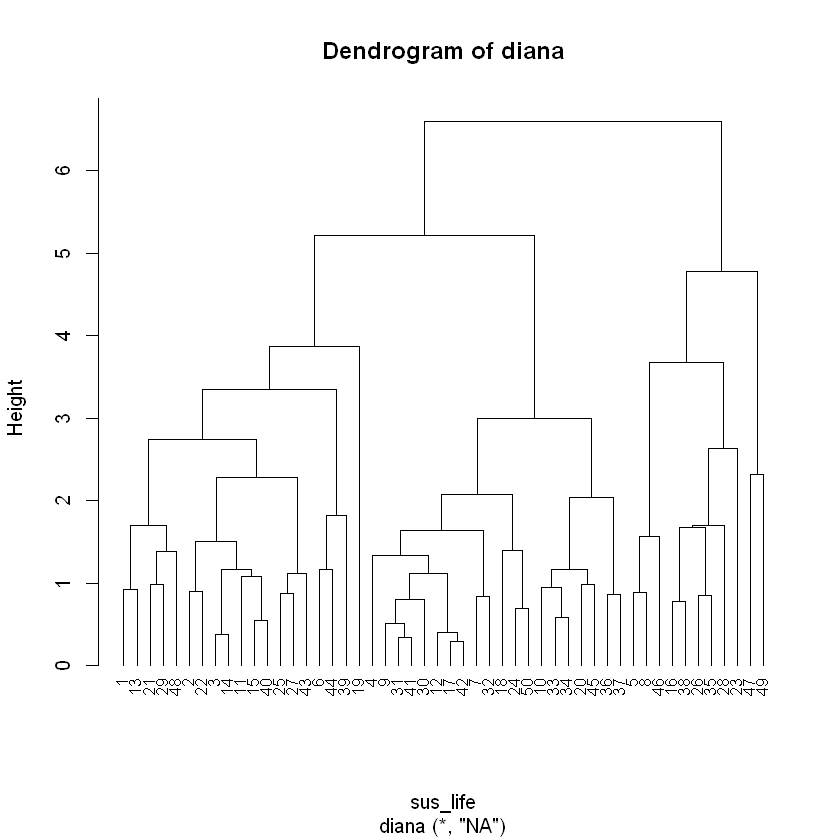

In [81]:
pltree(hc7, cex = 0.8, hang = -1, main = "Dendrogram of diana")

As we can see higher coefficient was using `agnes` function and the reason why is that because `diana` is more used for indetifying large clusters. 

# Working with Dendrograms

In the dendrogram displayed above, each leaf corresponds to one observation. As we move up the tree, observations that are similar to each other are combined into branches, which are themselves fused at a higher height.

The height of the fusion, provided on the vertical axis, indicates the (dis)similarity between two observations. The higher the height of the fusion, the less similar the observations are.

The height of the cut to the dendrogram controls the number of clusters obtained. It plays the same role as the k in k-means clustering. In order to identify sub-groups (i.e. clusters), we can cut the dendrogram with cutree:

In [82]:
# Ward's method
hc8 <- hclust(d, method = "ward.D2" )

# Cut tree into 4 groups
sub_grp <- cutree(hc8, k = 4)

# Number of members in each cluster
table(sub_grp)

sub_grp
 1  2  3  4 
14 21 13  2 

We can also use the cutree output to add the the cluster each observation belongs to to our original data.

In [67]:
life %>%
mutate(cluster = sub_grp) %>%
head

X,sr,pop15,pop75,dpi,ddpi,cluster
Australia,11.43,29.35,2.87,2329.68,2.87,1
Austria,12.07,23.32,4.41,1507.99,3.93,1
Belgium,13.17,23.80,4.43,2108.47,3.82,1
Bolivia,5.75,41.89,1.67,189.13,0.22,2
Brazil,12.88,42.19,0.83,728.47,4.56,2
Canada,8.79,31.72,2.85,2982.88,2.43,1


It’s also possible to draw the dendrogram with a border around the 4 clusters. The argument border is used to specify the border colors for the rectangles:

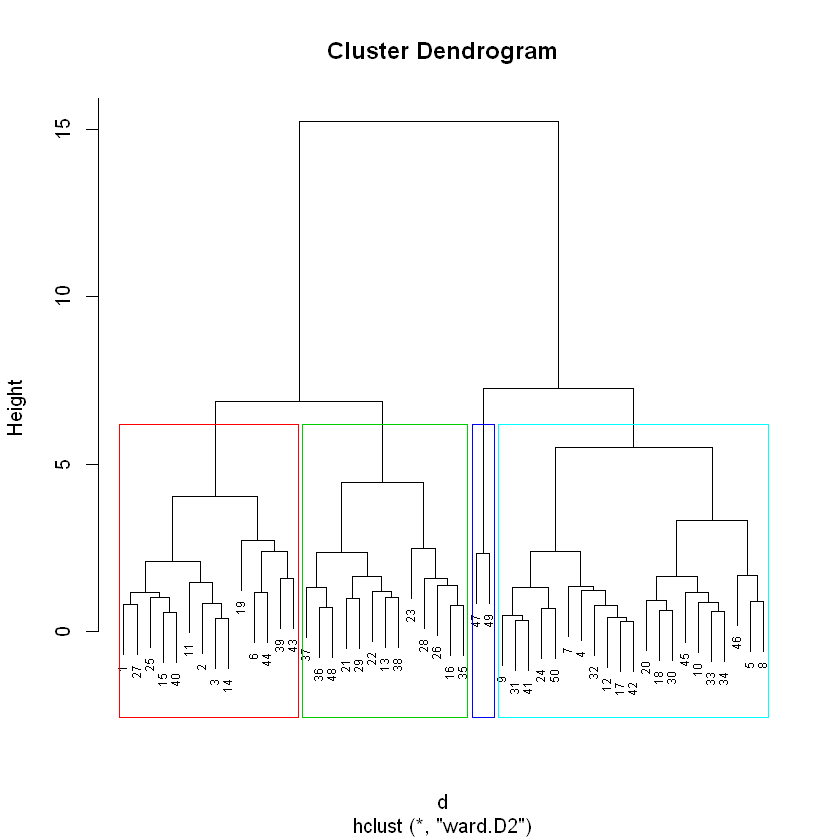

In [86]:
plot(hc8, cex = 0.6)
rect.hclust(hc8, k = 4, border = 2:5)

In [87]:
# Cut agnes() tree into 4 groups
hc_a <- agnes(sus_life, method = "ward")
cutree(as.hclust(hc_a), k = 4)

# Cut diana() tree into 4 groups
hc_d <- diana(sus_life)
cutree(as.hclust(hc_d), k = 4)

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  2  2  1  2  2  2  2  1  2  3  1  1  3  2  2  1  2  3  3  3  2  1  3 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
 1  3  3  2  2  2  2  2  3  3  3  3  1  1  2  2  1  1  2  2  4  3  4  2

1  2  3  4  5  6  7  8  9 10 11 12 13 14 15 16 17 18 19 20 21 22 23 24 25 26 
 1  1  1  2  3  1  2  3  2  2  1  2  1  1  1  3  2  2  1  2  1  1  3  2  1  3 
27 28 29 30 31 32 33 34 35 36 37 38 39 40 41 42 43 44 45 46 47 48 49 50 
 1  3  1  2  2  2  2  2  3  2  2  3  1  1  2  2  1  1  2  3  4  1  4  2

Lastly, we can also compare two dendrograms. Here we compare hierarchical clustering with complete linkage versus Ward’s method. The function tanglegram plots two dendrograms, side by side, with their labels connected by lines.

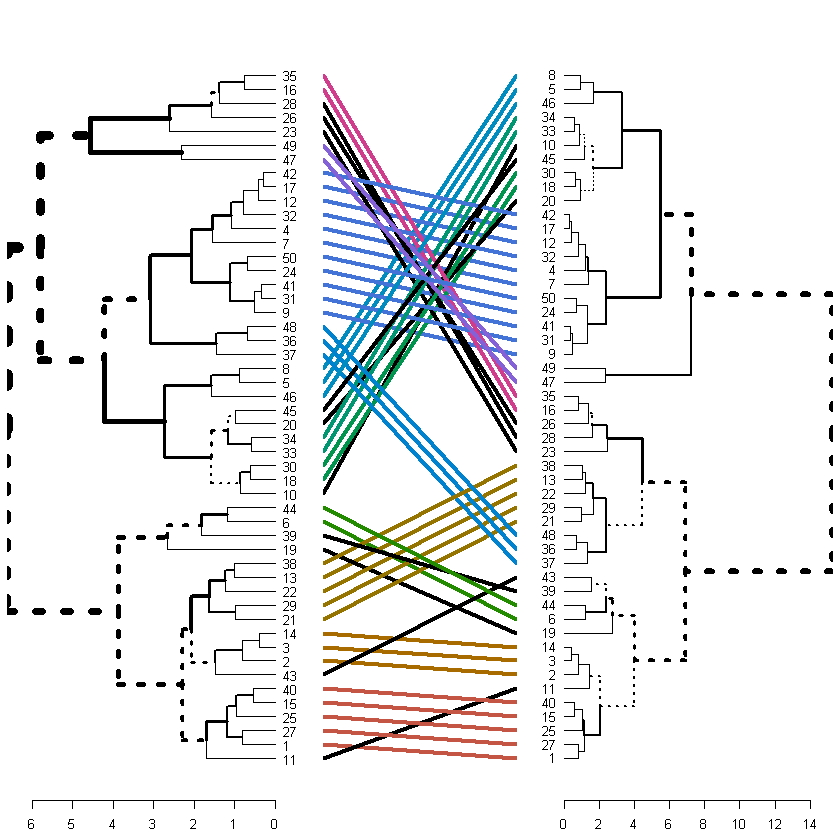

In [90]:
# Compute distance matrix
res.dist <- dist(sus_life, method = "euclidean")

# Compute 2 hierarchical clusterings
hc1 <- hclust(res.dist, method = "complete")
hc2 <- hclust(res.dist, method = "ward.D2")

# Create two dendrograms
dend1 <- as.dendrogram (hc1)
dend2 <- as.dendrogram (hc2)

tanglegram(dend1, dend2)

The output displays “unique” nodes, with a combination of labels/items not present in the other tree, highlighted with dashed lines. The quality of the alignment of the two trees can be measured using the function entanglement. Entanglement is a measure between 1 (full entanglement) and 0 (no entanglement). A lower entanglement coefficient corresponds to a good alignment. The output of tanglegram can be customized using many other options as follow:

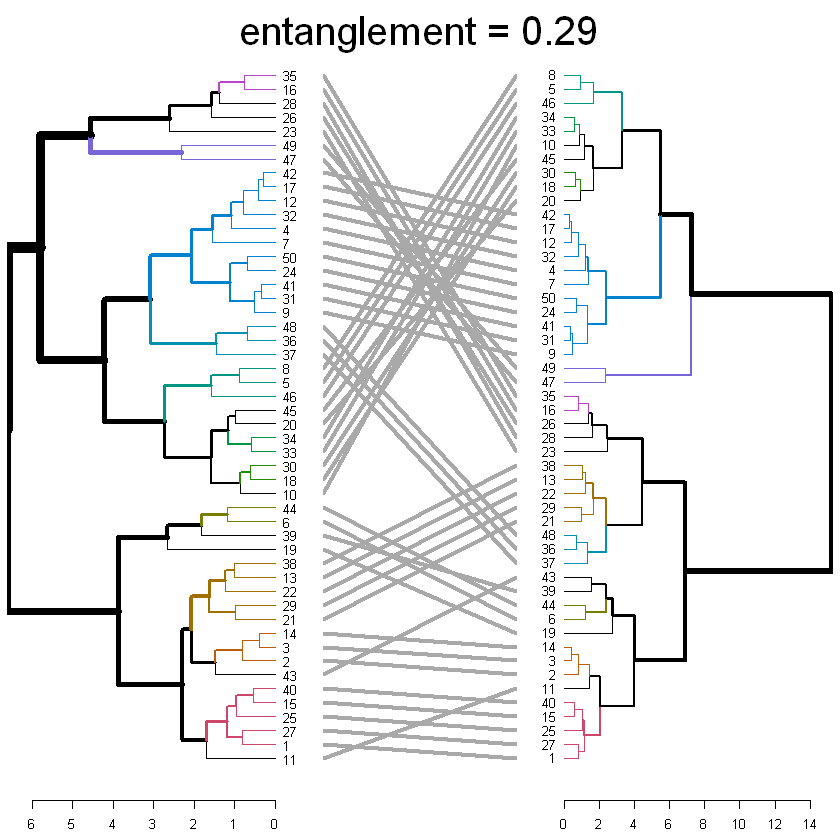

In [91]:
dend_list <- dendlist(dend1, dend2)

tanglegram(dend1, dend2,
  highlight_distinct_edges = FALSE, # Turn-off dashed lines
  common_subtrees_color_lines = FALSE, # Turn-off line colors
  common_subtrees_color_branches = TRUE, # Color common branches 
  main = paste("entanglement =", round(entanglement(dend_list), 2))
  )

As we can see our antaglement coefficient is not very high which indicates that I have good alignment of both trees.

Now, I want to see the quality of bad aligment. I predict that Ward and Single methods will have a high entanglement coefficient because of their AC coefficients. Ward has high and single kind a low.

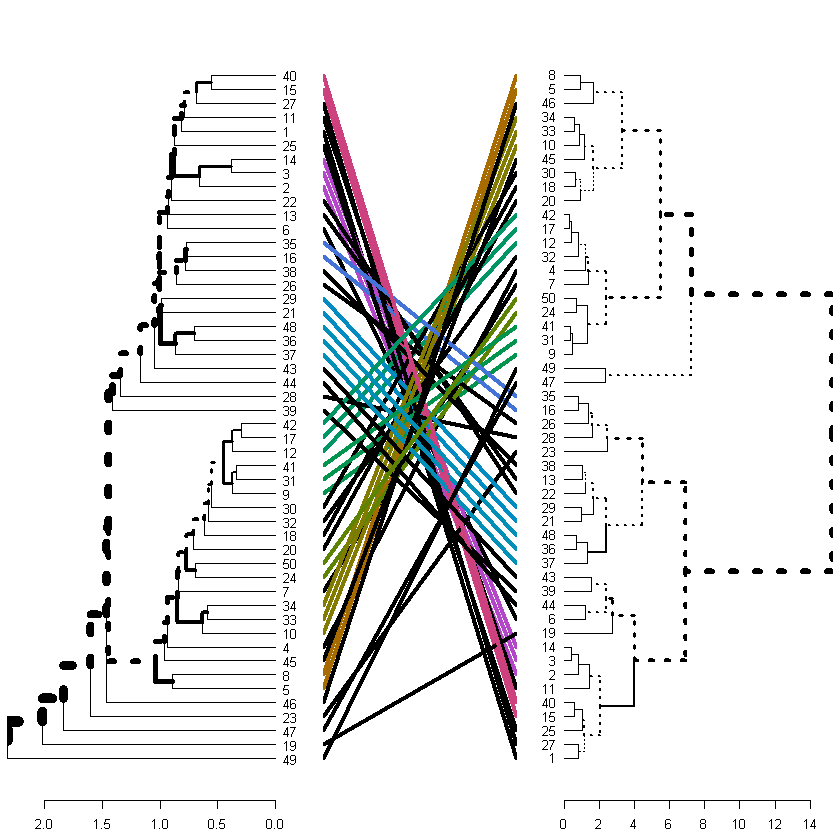

In [95]:
# Compute distance matrix
res.dist1 <- dist(sus_life, method = "euclidean")

# Compute 2 hierarchical clusterings
hc3 <- hclust(res.dist, method = "single")
hc4 <- hclust(res.dist, method = "ward.D2")

# Create two dendrograms
dend3 <- as.dendrogram (hc3)
dend4 <- as.dendrogram (hc4)

tanglegram(dend3, dend4)

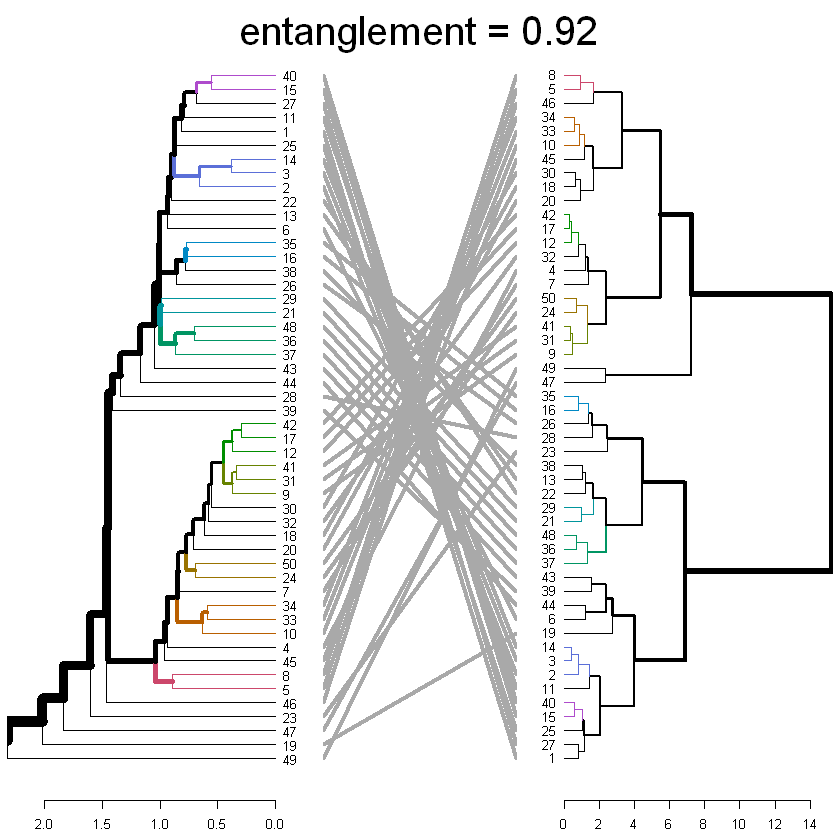

In [97]:
dend_list1 <- dendlist(dend3, dend4)

tanglegram(dend3, dend4,
  highlight_distinct_edges = FALSE, # Turn-off dashed lines
  common_subtrees_color_lines = FALSE, # Turn-off line colors
  common_subtrees_color_branches = TRUE, # Color common branches 
  main = paste("entanglement =", round(entanglement(dend_list1), 2))
  )

Now we can see,that entanglement coefficient is very high, meaning that their quality of alignment is low as I predicted.

# Determining Optimal Clusters

I can also can execute similar approaches for hierarchical clustering:

# Elbow Method

To perform the elbow method we just need to change the second argument in fviz_nbclust to FUN = hcut.

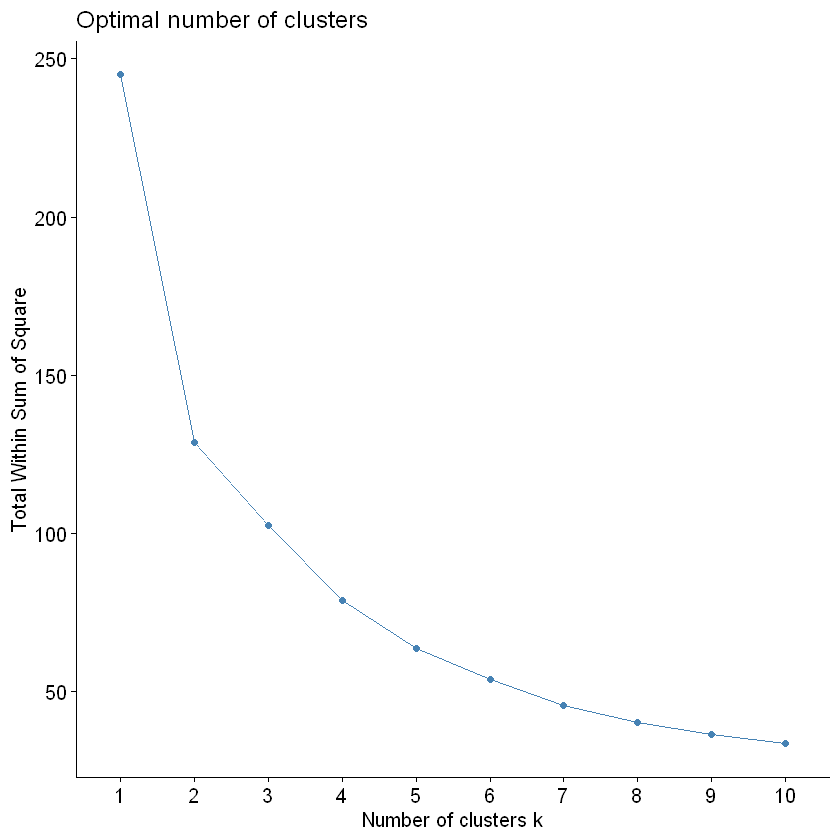

In [73]:
fviz_nbclust(sus_life, FUN = hcut, method = "wss")

# Average Silhouette Method

To perform the average silhouette method we follow a similar process.

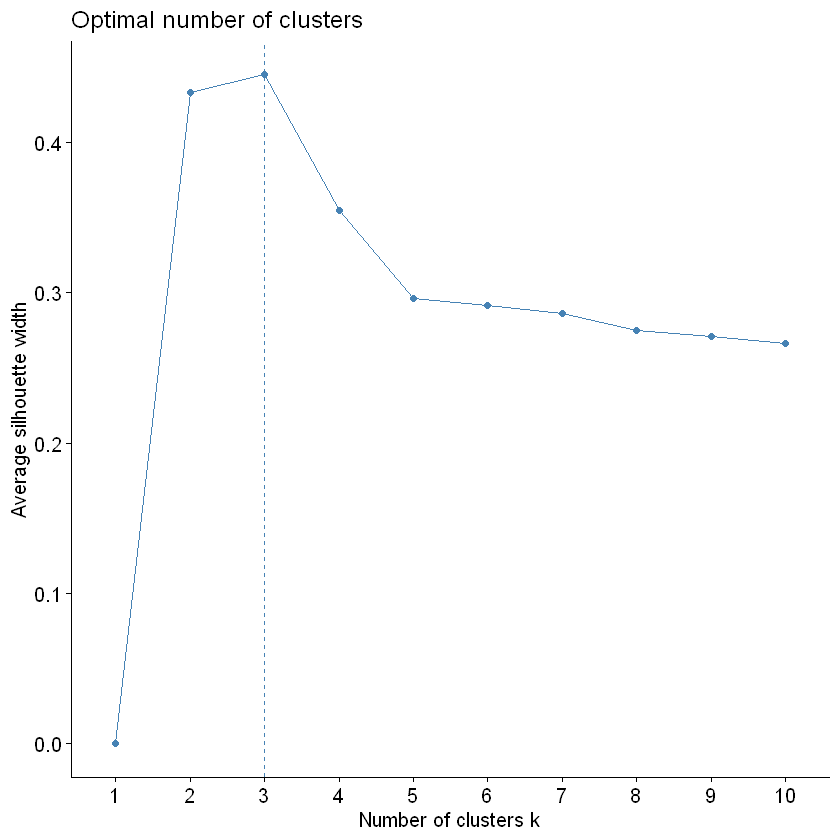

In [74]:
fviz_nbclust(sus_life, FUN = hcut, method = "silhouette")

# Gap Statistic Method

And the process is quite similar to perform the gap statistic method.

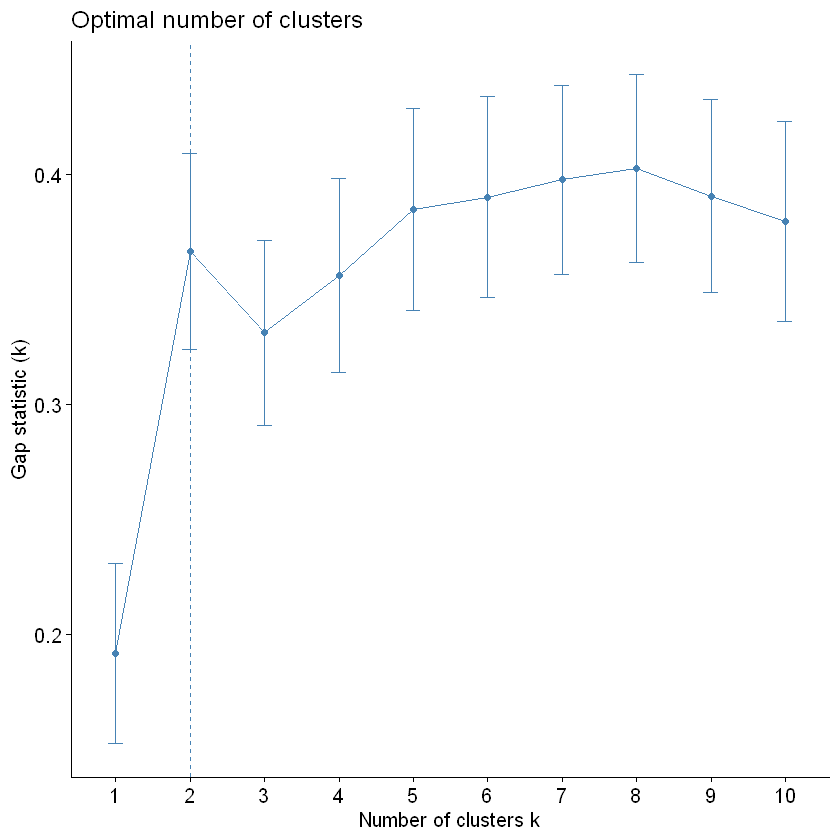

In [75]:
gap_stat <- clusGap(sus_life, FUN = hcut, nstart = 25, K.max = 10, B = 50)
fviz_gap_stat(gap_stat)

# Additional Comments

Clustering can be a very useful tool for data analysis in the unsupervised setting. However, there are a number of issues that arise in performing clustering. In the case of hierarchical clustering, we need to be concerned about:

    What dissimilarity measure should be used?
    What type of linkage should be used?
    Where should we cut the dendrogram in order to obtain clusters?

Each of these decisions can have a strong impact on the results obtained. 